<a href="https://colab.research.google.com/github/vk2k01/Dataset/blob/main/YBI_Project_Placement_Vaishnavi%2C_Akshita%2C_Sharon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:**  Placement prediction


---

**Project by:** Vaishnavi Krishnan, Akshita Venkatesan, Sharon Susan Xavier
(Mar Baselios College of Engineering and Technology, Thiruvananthapuram, Kerala, India)


##### **Dataset Source:** from YBI Foundation (GitHub)

## **Objective:** To predict the Placement of a student based on given parameters

## **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn import linear_model


## **Importing Dataset**

In [9]:
d=pd.read_csv('placements.csv',sep=',')
d.shape

(100, 4)

In [10]:
dataset=pd.DataFrame(d)

## **Exploring Data**

In [46]:
dataset.info() #to confirm there are no null or missing values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


## **Visulaizing Data using Matplotlib**

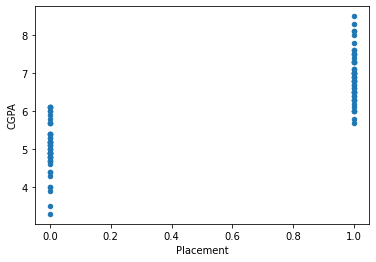

In [110]:
dataset.plot(kind='scatter',x='Placement',y='CGPA')
plt.show()

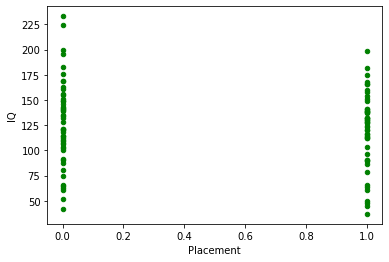

In [111]:
dataset.plot(kind='scatter',x='Placement',y='IQ',color='green')
plt.show()

## **Importing Libraries**

In [12]:
dataset.head(10)

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0
5,6,7.1,48,1
6,7,5.7,143,0
7,8,5.0,63,0
8,9,6.1,156,0
9,10,5.1,66,0


In [47]:
dataset['Placement'].value_counts() #to check whether there is equal distribution of values

1    50
0    50
Name: Placement, dtype: int64

In [112]:
dataset.groupby('Placement').mean()

,Student_ID,CGPA,IQ
Placement,,,
0,46.32,5.056,126.88
1,54.68,6.926,120.28


## **Define Target Variable y and Feature variables x**

In [50]:
x=dataset.drop(['Student_ID','Placement'], axis = 1)
y=dataset['Placement']

## **Standardize x values**

In [52]:
#this is done, since there are various ranges of data and scaling is required for correct predictions
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler() #used to scale data of different ranges
x=ssc.fit_transform(x)
x

array([[ 0.71095807, -0.01459341],
       [-0.0799718 , -0.44233119],
       [-0.60725838, -0.0649155 ],
       [ 1.23824465,  0.21185601],
       [-0.16785289,  0.46346647],
       [ 0.97460136, -1.90167186],
       [-0.25573399,  0.48862751],
       [-0.87090167, -1.52425617],
       [ 0.0957904 ,  0.81572111],
       [-0.78302057, -1.44877303],
       [ 0.0079093 , -1.977155  ],
       [ 0.79883917,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 0.35943369, -0.19072073],
       [ 0.0957904 , -0.51781433],
       [-0.78302057,  1.31894203],
       [-0.69513948,  2.52667224],
       [-2.36488031,  1.49506935],
       [-1.74971264, -0.59329747],
       [-0.69513948,  0.21185601],
       [ 0.53519588, -0.09007654],
       [ 0.97460136,  0.68991588],
       [-0.95878277, -0.09007654],
       [-1.13454496, -0.92039106],
       [-1.13454496, -0.0649155 ],
       [-0.87090167, -0.81974688],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 ,  0.01056764],
       [-0.69513948,

## **Train Test Split the Data**

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y,stratify=y, test_size = 0.3,random_state=2529)
'''
stratify: preserves proportion of target variable
random_state: used for initializing the internal random number generator, 
              which will decide the splitting of data into train and test indices
'''


'\nstratify: preserves proportion of target variable\nrandom_state: used for initializing the internal random number generator, \n              which will decide the splitting of data into train and test indices\n'

## **Create the Prediction Model and finding its accuracy**

In [54]:
from sklearn.linear_model import LogisticRegression
Model = linear_model.LogisticRegression()
Model.fit(x_train, y_train) 
accuracy = Model.score(x_test, y_test)
print("Model is at",accuracy*100,"% Accuracy")

Model is at 96.66666666666667 % Accuracy


## **Predicted values vs. Actual Values**

In [83]:
predictions = Model.predict(x_test)
print('y_test:\n',y_test)
print('predictions: ',predictions)

y_test:
 66    1
40    0
41    0
93    1
71    1
23    0
43    1
26    1
19    0
79    1
34    0
59    0
14    0
98    1
53    1
80    0
69    1
21    1
94    0
35    1
37    1
12    0
96    0
86    0
75    0
63    1
30    1
39    0
73    0
97    1
Name: Placement, dtype: int64
predictions:  [1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1]


In [82]:
#y_test is a series... so in order to get the predicted values we use seriesname.values
for i in range(len(predictions)):
  print("Model Predicted :",predictions[i],"  Actual value : ",y_test.values[i])

Model Predicted : 1   Actual value :  1
Model Predicted : 0   Actual value :  0
Model Predicted : 0   Actual value :  0
Model Predicted : 1   Actual value :  1
Model Predicted : 1   Actual value :  1
Model Predicted : 0   Actual value :  0
Model Predicted : 1   Actual value :  1
Model Predicted : 1   Actual value :  1
Model Predicted : 0   Actual value :  0
Model Predicted : 1   Actual value :  1
Model Predicted : 0   Actual value :  0
Model Predicted : 0   Actual value :  0
Model Predicted : 1   Actual value :  0
Model Predicted : 1   Actual value :  1
Model Predicted : 1   Actual value :  1
Model Predicted : 0   Actual value :  0
Model Predicted : 1   Actual value :  1
Model Predicted : 1   Actual value :  1
Model Predicted : 0   Actual value :  0
Model Predicted : 1   Actual value :  1
Model Predicted : 1   Actual value :  1
Model Predicted : 0   Actual value :  0
Model Predicted : 0   Actual value :  0
Model Predicted : 0   Actual value :  0
Model Predicted : 0   Actual value :  0


## **Model Evaluation**

In [84]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[14  1]
 [ 0 15]]


In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## **Future Predictions**

here a random value is selected from the dataset as a new value so that we can make prediction.



steps:
1.   extracted x and y, using random.randrange() to generate an index to select a random row from dataframe, then we use sample()
2.   separated x and y
3.   standardize x
4.   make prediction







In [98]:
x_new=dataset.sample(1) #sample(1) generates 1 random row
x_new

,Student_ID,CGPA,IQ,Placement
89,90,4.9,151,0


In [99]:
x_new=x_new.drop(['Student_ID','Placement'], axis = 1)
x_new

,CGPA,IQ
89,4.9,151


In [100]:
#scaling x_new
x_new=ssc.fit_transform(x_new)
x_new

array([[0., 0.]])

In [101]:
new_prediction=Model.predict(x_new)
new_prediction

array([0])

## **Explanation**

---
####This project was to predict the placement of a student with given parameters, and was implemented using **Logistic Regression**. Through the project we learnt how to visualize data, create a model by splitting data using sklearn and create its confusion matrix and classification report, and to generate future predictions using the created model. Many new functions were also introduced.
